In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds


# **Sample Equation Data**

## load, clean and prepare data

In [ ]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype=float)

## build the model

In [ ]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


## train the model - fit the training data

In [ ]:
model.fit(xs, ys, epochs=1000, verbose=0)

## evaluate the model

In [ ]:
print(model.predict([10.0]))

[[31.00004]]


# **MNIST Dataset**

## load, clean and prepare data

In [ ]:
#(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, y_train = tfds.as_numpy(tfds.load('mnist', as_supervised=True, split='train', batch_size=-1))
x_test, y_test = tfds.as_numpy(tfds.load('mnist', as_supervised=True, split='test', batch_size=-1))

x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


## build the model

In [ ]:
mnist_model = keras.Sequential([
                                keras.layers.Flatten(input_shape=(28,28,1)),
                                #keras.layers.Dense(128, activation='relu'),
                                keras.layers.Dense(10, activation='softmax')
                                ])
mnist_model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
print(mnist_model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


## train the model - fit the training data

In [ ]:
mnist_model.fit(x_train, y_train, epochs=1, batch_size=1)

60000/60000 [==============================] - 62s 1ms/step - loss: 0.3621 - accuracy: 0.8966


## evaluate the model

In [ ]:
mnist_model.evaluate(x_test,y_test,batch_size=1)

10000/10000 [==============================] - 9s 907us/step - loss: 0.2883 - accuracy: 0.9205


[0.28832605481147766, 0.9204999804496765]

# **Boston Housing Price Dataset**

## load, clean and prepare data

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()
print(x_train.shape)


(404, 13)


## build the model

In [ ]:
house_model = keras.Sequential([
                                keras.layers.Dense(units=64, input_shape=[x_train.shape[1]], activation='relu'),
                                keras.layers.Dense(units=64, activation='relu'),
                                keras.layers.Dense(units=1, activation='linear')
                                ])
house_model.compile(optimizer='RMSprop', loss='mse', metrics=['mse', 'mae'])
print(house_model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
None


## train the model - fit the training data

In [ ]:
house_model.fit(x_train, y_train, epochs=1000, verbose=0)

## evaluate the model

In [ ]:
house_model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 34.5645 - mse: 34.5645 - mae: 4.1302


[34.56452941894531, 34.56452941894531, 4.130185127258301]

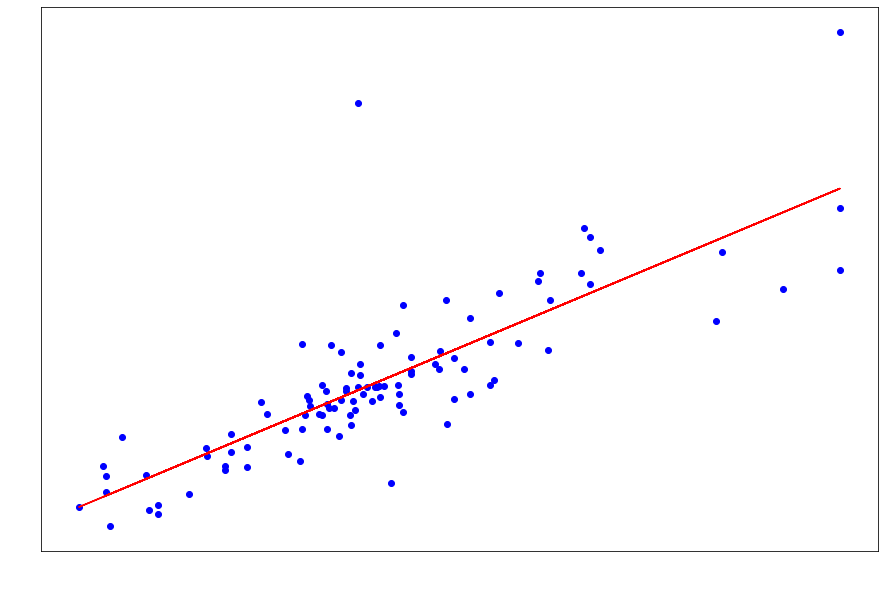

In [ ]:
y_test_pred = house_model.predict(x_test).flatten()

f, ax = plt.subplots(figsize = (15,10))
plt.rc('font', size=18)
ax.set_xlabel("Original Price")
ax.set_ylabel("Predicted Price")
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(colors='white')
plt.scatter(x=y_test, y=y_test_pred, color='blue')
z = np.polyfit(y_test, y_test_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),'r')
